In [1]:
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.conn().connect()

Please enter DataJoint username: thinh
Please enter DataJoint password: ········
Connecting thinh@mesoscale-activity.datajoint.io:3306


In [2]:
%matplotlib inline
import os
os.chdir('..')
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
from pipeline import lab, experiment, ephys, tracking, histology
from pipeline import export, psth

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
histology.ElectrodeCCFPosition()

subject_id institution 6 digit animal ID,session session number,insertion_number
435884,20,1


In [6]:
probe_insertion = ephys.ProbeInsertion & {'subject_id': 435884, 'session': 20, 'insertion_number': 1}

In [10]:
ephys.Unit & probe_insertion.proj() & 'unit_quality != "all"'

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform
435884,20,1,jrclust,1,1,good,15131808323,npx_first384,0,6,42.4544792175293,33.699256896972656,=BLOB=,294.20157,13.780584,=BLOB=
435884,20,1,jrclust,5,5,good,15131808323,npx_first384,0,5,14.338550567626953,38.978546142578125,=BLOB=,157.83987,7.869556,=BLOB=
435884,20,1,jrclust,10,10,good,15131808323,npx_first384,0,10,44.27643966674805,79.20182800292969,=BLOB=,275.46558,13.48085,=BLOB=
435884,20,1,jrclust,11,11,good,15131808323,npx_first384,0,10,45.542633056640625,80.29844665527344,=BLOB=,117.8578,6.137078,=BLOB=
435884,20,1,jrclust,15,15,good,15131808323,npx_first384,0,12,31.08588409423828,98.89152526855469,=BLOB=,242.60864,14.416281,=BLOB=
435884,20,1,jrclust,18,18,good,15131808323,npx_first384,0,18,45.05342483520508,159.88873291015625,=BLOB=,142.01253,8.705505,=BLOB=
435884,20,1,jrclust,21,21,good,15131808323,npx_first384,0,22,46.288734436035156,199.1356201171875,=BLOB=,411.5883,19.068323,=BLOB=
435884,20,1,jrclust,26,26,good,15131808323,npx_first384,0,24,33.41889190673828,219.63931274414062,=BLOB=,390.69846,23.492113,=BLOB=
435884,20,1,jrclust,27,27,good,15131808323,npx_first384,0,26,41.57817077636719,240.8029327392578,=BLOB=,262.42502,11.292686,=BLOB=
435884,20,1,jrclust,33,33,good,15131808323,npx_first384,0,31,9.875179290771484,300.81817626953125,=BLOB=,180.45468,10.760204,=BLOB=


In [16]:
probe_json = export.write_to_activity_viewer_json(probe_insertion, filepath='./testing.json', per_period=True)

59it [01:11,  1.19s/it]


In [9]:
probe_json

'{"id": "435884(dl59)/12-07-2018(20)/1", "points": [{"id": "1", "x": "2460", "y": "6180", "z": "6320", "alpha": 0.8, "color": {"t": "range(0, 1)", "vals": ["#0000FF"]}, "radius": {"t": "range(0, 1)", "vals": [3.19286]}}, {"id": "5", "x": "2460", "y": "6200", "z": "6320", "alpha": 0.8, "color": {"t": "range(0, 1)", "vals": ["#0000FF"]}, "radius": {"t": "range(0, 1)", "vals": [17.3403]}}, {"id": "10", "x": "2460", "y": "6140", "z": "6300", "alpha": 0.8, "color": {"t": "range(0, 1)", "vals": ["#FF0000"]}, "radius": {"t": "range(0, 1)", "vals": [3.97449]}}, {"id": "11", "x": "2460", "y": "6140", "z": "6300", "alpha": 0.8, "color": {"t": "range(0, 1)", "vals": ["#0000FF"]}, "radius": {"t": "range(0, 1)", "vals": [8.16294]}}, {"id": "15", "x": "2460", "y": "6120", "z": "6300", "alpha": 0.8, "color": {"t": "range(0, 1)", "vals": ["#FF0000"]}, "radius": {"t": "range(0, 1)", "vals": [2.49681]}}, {"id": "18", "x": "2460", "y": "6040", "z": "6280", "alpha": 0.8, "color": {"t": "range(0, 1)", "val

In [15]:
import importlib
importlib.reload(export)

<module 'pipeline.export' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\export.py'>

In [11]:
from pipeline.plot import behavior_plot

In [16]:
erd = (dj.ERD(experiment.Session) + lab.Subject + ephys.ProbeInsertion + ephys.Unit
       + experiment.BehaviorTrial + experiment.PhotostimTrial + ephys.TrialSpikes
       + experiment.Photostim + experiment.TrialInstruction + experiment.Outcome
       + experiment.TrialEvent
       + psth.UnitSelectivity)

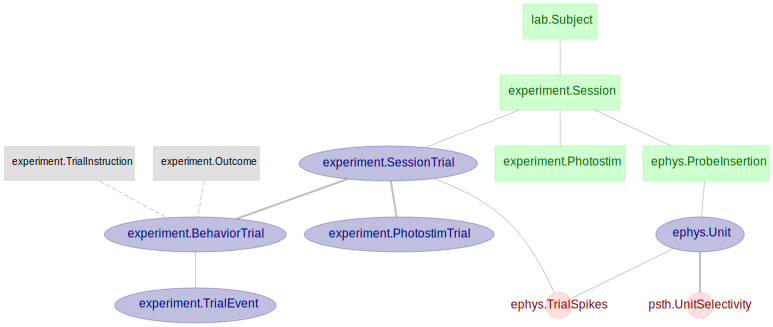

In [17]:
erd

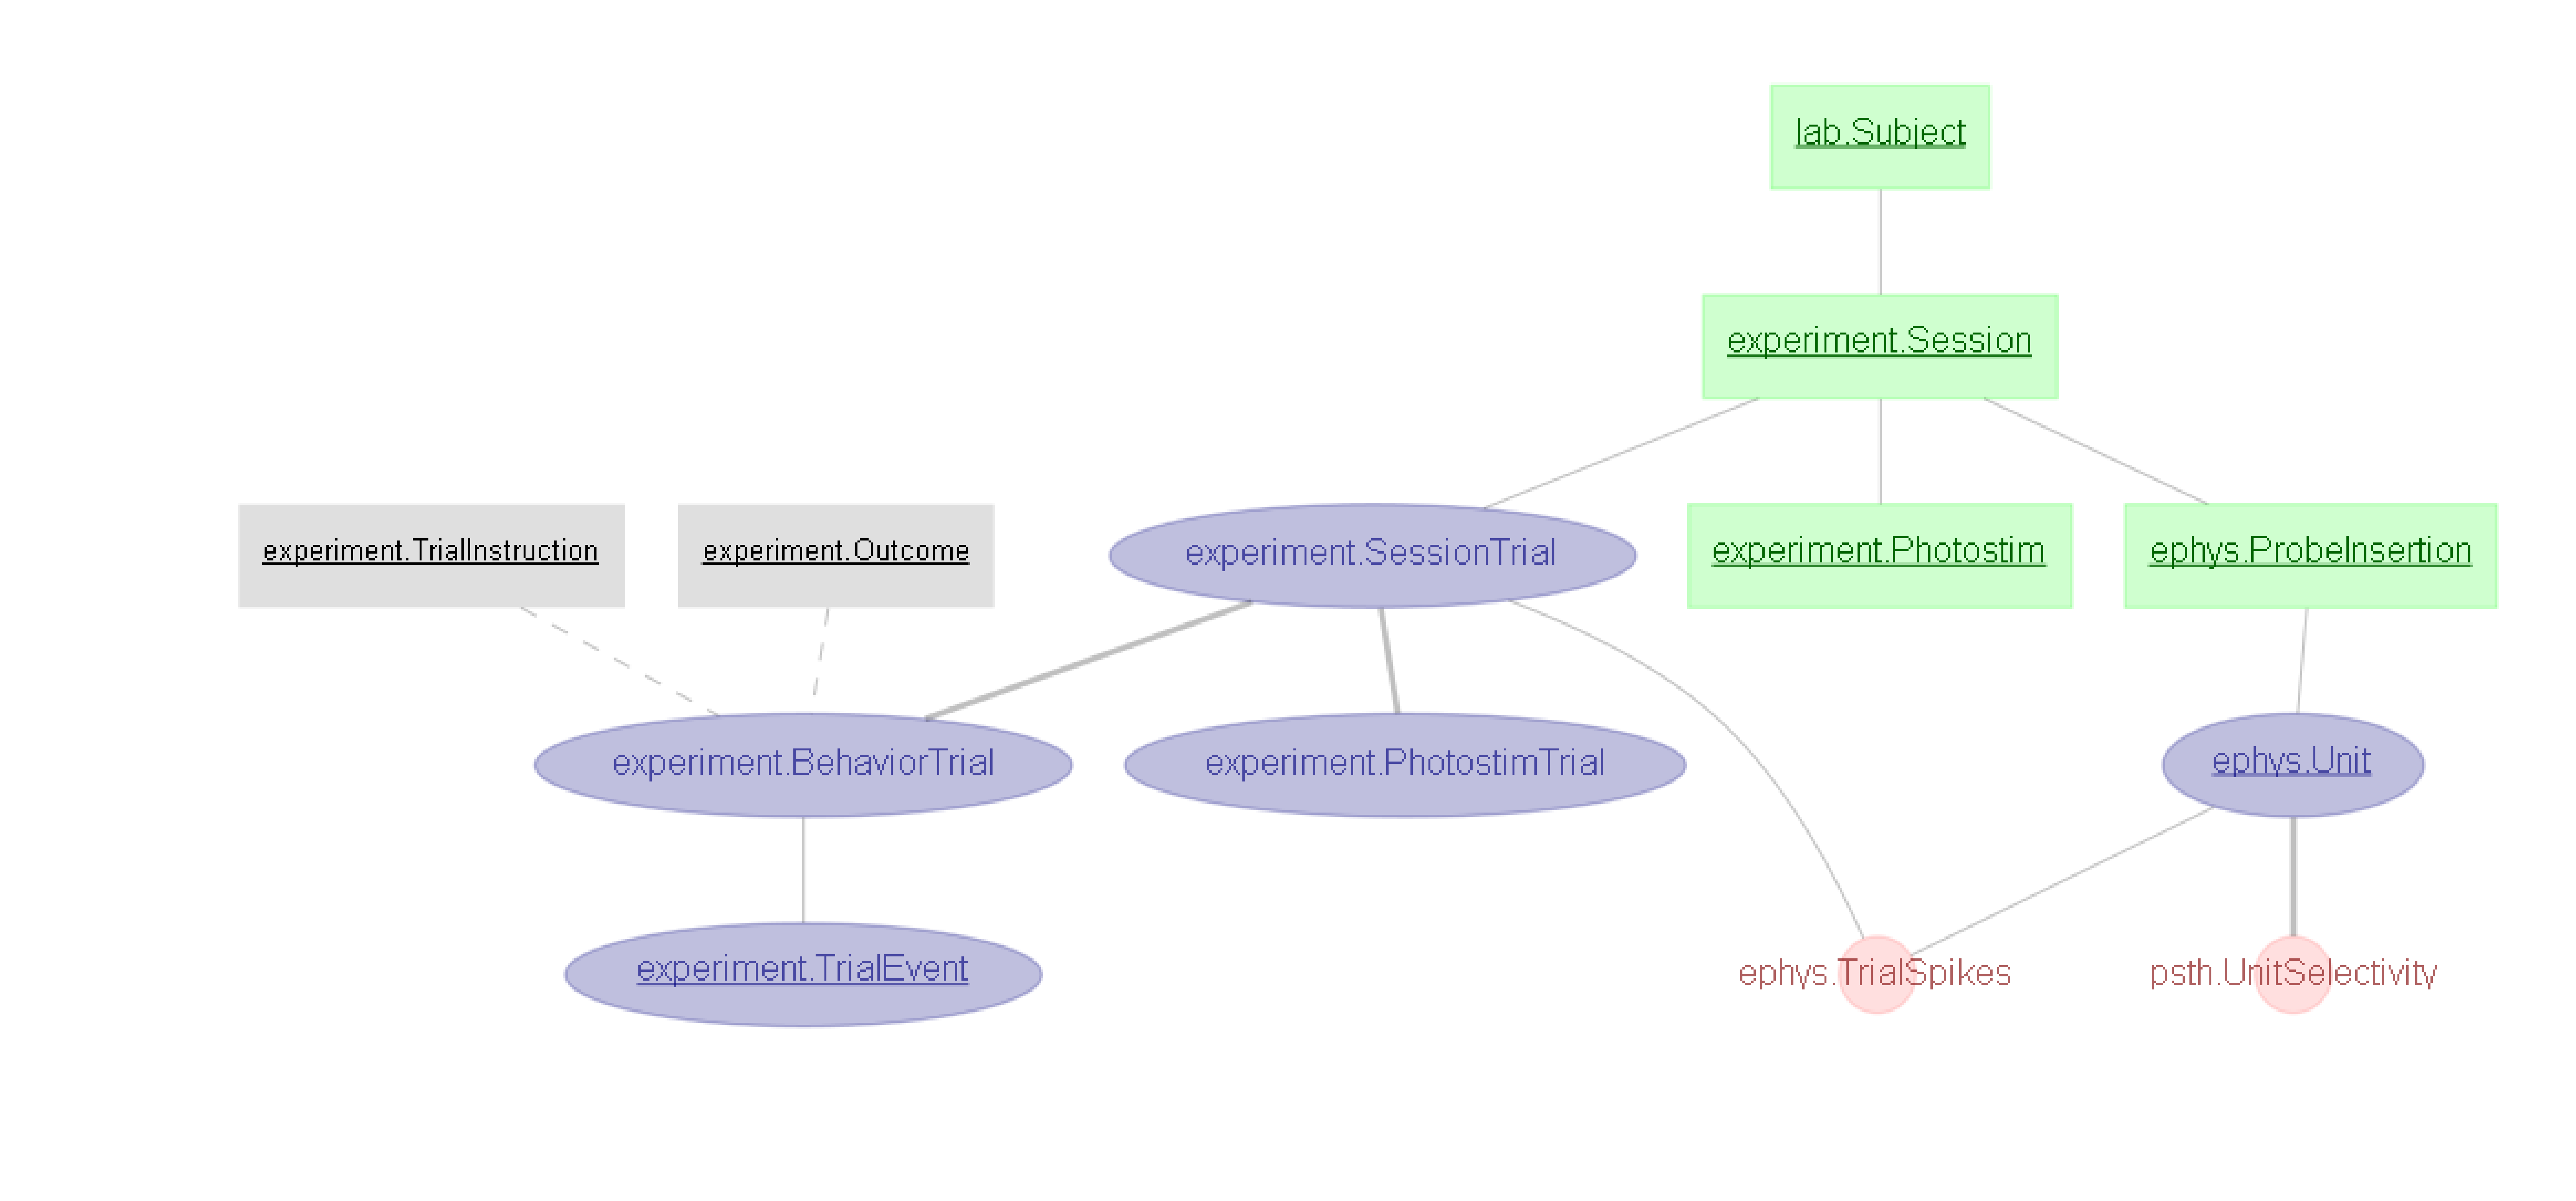

In [20]:
fig, ax = plt.subplots(1, 1, dpi=1500)
erd.draw()

In [22]:
fig.savefig('map_erd.png')

In [74]:
Unit * ProbeInsertion.InsertionLocation & 'brain_location_name = "left_alm"' & "unit_quality = 'good'" & 'unit_snr > 20'

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform,brain_location_name unique name of this brain location (could be hash of the non-primary attr),ml_location um from ref ; right is positive; based on manipulator coordinates/reconstructed track,ap_location um from ref; anterior is positive; based on manipulator coordinates/reconstructed track,dv_location um from dura; ventral is positive; based on manipulator coordinates/reconstructed track,ml_angle Angle between the manipulator/reconstructed track and the Medio-Lateral axis. A tilt towards the right hemishpere is positive.,ap_angle Angle between the manipulator/reconstructed track and the Anterior-Posterior axis. An anterior tilt is positive.
413950,21,1,jrclust,117,117,good,15131808323,npx_first384,0,60,15.204913139343262,601.15087890625,=BLOB=,565.0055,26.499899,=BLOB=,left_alm,1500.0,2500.0,1888.8,nan,nan
413950,21,1,jrclust,244,244,good,15131808323,npx_first384,0,95,15.155431747436523,962.064697265625,=BLOB=,413.7164,24.844046,=BLOB=,left_alm,1500.0,2500.0,1888.8,nan,nan
413950,21,1,jrclust,303,303,good,15131808323,npx_first384,0,117,32.31532287597656,1179.74609375,=BLOB=,887.01794,62.880203,=BLOB=,left_alm,1500.0,2500.0,1888.8,nan,nan
432572,14,1,jrclust,10,10,good,15131808323,npx_first384,0,13,12.560837745666504,122.04619598388672,=BLOB=,403.95468,27.297083,=BLOB=,left_alm,1500.0,2500.0,1666.6,nan,nan
432572,14,1,jrclust,21,21,good,15131808323,npx_first384,0,22,43.97399139404297,203.5450897216797,=BLOB=,452.8266,22.647749,=BLOB=,left_alm,1500.0,2500.0,1666.6,nan,nan
432572,14,1,jrclust,31,31,good,15131808323,npx_first384,0,27,0.5903418064117432,260.0388488769531,=BLOB=,521.61304,27.24233,=BLOB=,left_alm,1500.0,2500.0,1666.6,nan,nan
432572,14,1,jrclust,48,48,good,15131808323,npx_first384,0,34,41.81938171386719,320.5578308105469,=BLOB=,444.54144,26.812925,=BLOB=,left_alm,1500.0,2500.0,1666.6,nan,nan
432572,14,1,jrclust,111,111,good,15131808323,npx_first384,0,58,3.1883482933044434,581.4051513671875,=BLOB=,441.075,23.303812,=BLOB=,left_alm,1500.0,2500.0,1666.6,nan,nan
432572,14,1,jrclust,120,120,good,15131808323,npx_first384,0,67,31.187633514404297,658.5445556640625,=BLOB=,416.17502,21.728865,=BLOB=,left_alm,1500.0,2500.0,1666.6,nan,nan
432572,14,1,jrclust,151,151,good,15131808323,npx_first384,0,79,18.822280883789062,799.4124755859375,=BLOB=,352.43002,22.740444,=BLOB=,left_alm,1500.0,2500.0,1666.6,nan,nan


## Generate canonical pipeline ERDs

In [57]:
from pipeline.lab import *
from pipeline.ephys import *
from pipeline.experiment import *
from pipeline.psth import *

In [44]:
ephys_erd = (dj.ERD(Session) + Subject + ProbeInsertion + (dj.Diagram(Unit) - 1)
             + Probe + ProbeType + ElectrodeConfig + BrainArea + Hemisphere
             + ProbeInsertion.InsertionLocation + LFP + LFP.Channel)

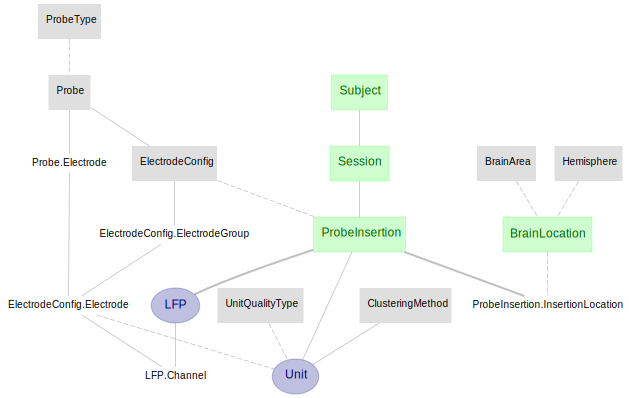

In [45]:
ephys_erd

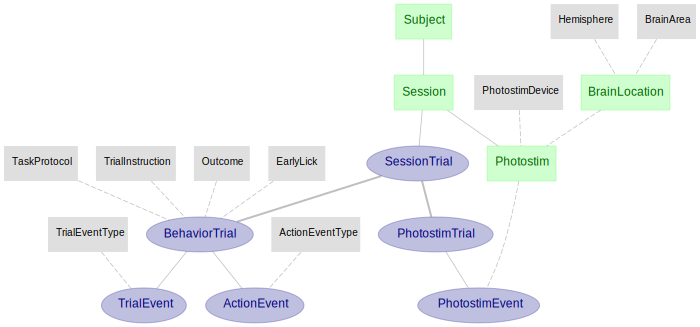

In [56]:
((dj.Diagram(BehaviorTrial) - 1) + (dj.Diagram(PhotostimTrial) - 1)
 + Subject + ActionEvent + TrialEvent + ActionEventType + TrialEventType
 + PhotostimEvent + Photostim + BrainArea + Hemisphere + PhotostimDevice)

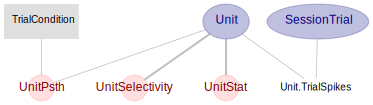

In [64]:
dj.Diagram(UnitPsth) - 1 + Unit.TrialSpikes + SessionTrial + UnitSelectivity + UnitStat